## PART 1 - DATA PREPROCESSING

In [1]:
import csv
import re
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import BatchNormalization
import torch
import torchvision
import nlpaug.augmenter.word as naw
import matplotlib.pyplot as plt

In [2]:
with open("C:\data\son.csv", 'r',encoding='utf-8') as file:
    print(f"Each data point looks like this:\n{file.readline()}")

Each data point looks like this:
﻿terridawnarnold;1;@mylearnie @DistanceLrnBot Distance learning may be the future for even more students than before Covid-19. Brick and mortar schools will be modified. At least that is a theory some educators share.;;;;;



The removal of stopwords from text data is a critical step. They are the most often used words in the language, yet they rarely provide useful information. 

This function receives a string, removes the predetermined stopwords and the punctuations from that string.

In [3]:
def removeStopwords(sentence):
    # List of stopwords
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", 
                 "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could","down", 
                 "during", "each", "few", "for", "from", "further", "had","having","have",
                 "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how",
                 "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", 
                 "let's", "me", "more", "most", "my", "myself", "of", "on", "once", "only", "or", "other", "ought", 
                 "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", 
                 "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", 
                 "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "though",
                 "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", 
                 "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom",
                 "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself",
                 "yourselves" ]
    
    # Convert sentences to lowercase
    sentence = sentence.lower()
    
    # Divide sentences into a list
    sentence = sentence.split()
    
    words = []
    for word in sentence:
        if word not in stopwords:
            words.append(word)
    sentence = ' '.join([str(elem) for elem in words])
    
     # remove punctuation
    sentence = re.sub(r'[^\w\s]', '', sentence)
    
    return sentence

In [4]:
def removeUsernames(sentence):
    # remove urls
    sentence = re.sub(r"http\S+ *", "", sentence)
    # remove usernames
    sentence = re.sub(r'@\S+ *', '', sentence)
    return sentence

Let's check how well the function works. We will remove the stopword from the sentence "There are places I'll remember, all my life though some have changed..."

It should become "places remember, life changed"

In [5]:
removeStopwords("There are places I'll remember, all my life though some have changed...")

'places remember life changed'

Now we need to read the data from the csv file. We will read it line by line, and omit the first line as it contains the headers and not data points.
Each data is separated by a comma. The first part is the username, second part is the label of the data and the last part is the actual data. Since the username is an unnecessary information, we will not save it. 

In [6]:
def readFromFile(filename):
    sentences = []
    labels = []
    
    with open(filename, 'r',encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile, delimiter=';')
        lineCount = 0
        # we will omit the first line since it contains the headers
        for row in reader:
            if lineCount == 0:
                lineCount += 1
                
            # row[0] is the username
            # row[1] is the label
            # row[2] is the sentence
            else:              
                if row[1] != '2':
                    labels.append(int(row[1]))
                    sentences.append(removeUsernames(row[2]))
                lineCount += 1
        
    return sentences, labels

In [7]:
sentences, labels = readFromFile("C:\data\son.csv")

print("There are", len(sentences), "sentences in the dataset")
print("There are", len(labels), "labels in the dataset\n")


There are 406 sentences in the dataset
There are 406 labels in the dataset



In [8]:
size = 300

aug = naw.ContextualWordEmbsAug(
    model_path='bert-base-uncased', action="insert")
augmented_sentences = aug.augment(sentences[0:size])

Let's check the first 10 data points:

In [9]:
for i in range(10):
    print("Label:",labels[i])
    print("Sentence:",sentences[i])
    print()

Label: 0
Sentence: Rasa sebak pulak nak buat reflective essay pasal impact covid-19 on online learning. Suddenly it hit me soo hard with all the struggles, mental breakdown, crying session, give up with my degree. Literally during the process just dull. I officially unlock myself into another level

Label: 1
Sentence: i am not mentally ready to wake up at 7 again but its good bc I am doin online bc of how bad covid is🤦🏽(only going to school for like 3 days)

Label: 0
Sentence: It will be more dangerous for my 13yo for schools not to reopen on time. Last lockdown he started cutting himself from the anxiety of remote learning. He is fully vaccinated - we have to balance very carefully COVID against other health concerns (especially mental health).

Label: 1
Sentence: This is why we need to STOP Mass Testing Now #together  "The biggest threat to keeping children in face-to-face education will be high numbers of teachers forced into self-isolation after testing positive for Covid-19"  #Tog

Let's check the first 10 augmented sentences:

In [10]:
for i in range(10):
    print("Augmented Sentence:",augmented_sentences[i])
    print("Label:",labels[i])
    print()

Augmented Sentence: ana rasa sebak pulak nak buat reflective essay pasal de impact covid - 19 project on online learning. suddenly in it has hit me and soo hard with all in the struggles, mental breakdown, crying session, give growing up everything with my degree. literally during the process just dull. i officially unlock myself into having another level
Label: 0

Augmented Sentence: plus i am not so mentally ever ready to wake up early at 7 again but its good bc instead i am doin online bc of knowing how it bad covid [UNK] ( only going to school for something like... 3 weeks days )
Label: 1

Augmented Sentence: it will not be more dangerous for what my 13yo for schools teachers not to reopen on time. that last lockdown he started cutting himself from the anxiety of remote and learning. he still is fully already vaccinated - we have to conserve balance very also carefully covid against other health concerns ( potentially especially mental health ).
Label: 0

Augmented Sentence: this i

Concatenate the sentences and the augmented sentences and their corresponding labels:

In [11]:
print(f"Sentences have {len(sentences)} elements and labels have {len(labels)} elements before the concatenation")
sentences += augmented_sentences
labels += labels[0:size]
print(f"Sentences have {len(sentences)} elements and labels have {len(labels)} elements after the concatenation")

Sentences have 406 elements and labels have 406 elements before the concatenation
Sentences have 706 elements and labels have 706 elements after the concatenation


In [12]:
newSentences = []
for i in range(len(sentences)):
    newSentences.append(removeStopwords(sentences[i]))
sentences = newSentences

Let's check the first 10 data points again after removal of the stop words

In [13]:
for i in range(10):
    print("Label:",labels[i])
    print("Sentence:",sentences[i])
    print()

Label: 0
Sentence: rasa sebak pulak nak buat reflective essay pasal impact covid19 online learning suddenly hit soo hard struggles mental breakdown crying session give degree literally process just dull officially unlock another level

Label: 1
Sentence: not mentally ready wake 7 good bc doin online bc bad covid isonly going school like 3 days

Label: 0
Sentence: will dangerous 13yo schools not reopen time last lockdown started cutting anxiety remote learning fully vaccinated  balance carefully covid health concerns especially mental health

Label: 1
Sentence: need stop mass testing now together the biggest threat keeping children facetoface education will high numbers teachers forced selfisolation testing positive covid19 togetherdeclaration

Label: 0
Sentence: upper class entitled families school refused covid vaccine get covid asked quarantine will refuse will not participate ineffective distance learning az has schools

Label: 1
Sentence: believe better stays online education till 

In [14]:
print("First sentence has", len(sentences[0].split()), "words after removal of the stopwords")
print(f"The first 5 labels are {labels[:5]}")
print("0: Negative\t1: Positive")

First sentence has 31 words after removal of the stopwords
The first 5 labels are [0, 1, 0, 1, 0]
0: Negative	1: Positive


In [15]:
positive = 0
negative = 0

for i in range(len(labels)):
    if labels[i] == 0:
        negative += 1
    elif labels[i] == 1:
        positive += 1
print("Positive:",positive)
print("Negative:",negative)

Positive: 312
Negative: 394


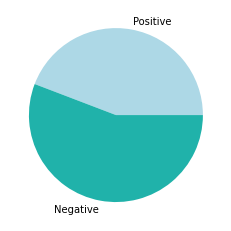

In [16]:
mylabels = ["Positive", "Negative"]

plt.pie([positive,negative], labels = mylabels,colors=["lightblue",'lightseagreen'])
plt.show() 

Our data set is a little imbalanced. The number of negative labels is greater than the positive labels.

## TOKENIZATION

In [17]:
OOV = "<OOV>"
VOCAB_SIZE = 500

In [18]:
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token = OOV)
tokenizer.fit_on_texts(sentences)
words = tokenizer.word_index
# VOCAB_SIZE = len(tokenizer.word_index) + 1

In [19]:
len(tokenizer.word_index)

3382

Find the largest sentence and its number of words ( to be able to use in padding )

In [20]:
MAXLEN = 0
for s in sentences:
    word_list = s.split()
    num = len(word_list)
    if MAXLEN < num:
        MAXLEN = num

In [21]:
MAXLEN

45

In [22]:
MAXLEN = MAXLEN - 10
sequences = tokenizer.texts_to_sequences(sentences)
paddedSequences = pad_sequences(sequences, padding= 'post', maxlen = MAXLEN)

### Split the data into training set and validation set

In [23]:
# shuffle the data

labels = np.asarray(labels)
indices = np.arange(paddedSequences.shape[0])
np.random.shuffle(indices)
paddedSequences = paddedSequences[indices]
labels = labels[indices]

In [24]:
split = 0.2
testSetSize = int(len(sentences)*split)


X_test = paddedSequences[0:testSetSize]   # take first n elements of the sequences for the test set
X = paddedSequences[testSetSize:]    # take the rest for X set
y_test = labels[0:testSetSize]   # take first n elements of the labels for the test set
y = labels[testSetSize:]  # take the rest for y set

valSetSize = int(len(X)*split)

# Split the X and y sets into trainnig sets and validation sets

X_val = X[0:valSetSize]
y_val = y[0:valSetSize]
X_train = X[valSetSize:]
y_train = y[valSetSize:]


In [25]:
print("Training set has",len(X_train),"sentences and",len(y_train),"labels")
print("Validation set has",len(X_val),"sentences and",len(y_val),"labels")
print("Test set has",len(X_test),"sentences and",len(y_test),"labels")

Training set has 452 sentences and 452 labels
Validation set has 113 sentences and 113 labels
Test set has 141 sentences and 141 labels


In [26]:
print("Shape of the padded training sequences:", X_train.shape)
print("Shape of the padded validation sequences:", X_val.shape)
print("Shape of the padded testing sequences:", X_val.shape)

Shape of the padded training sequences: (452, 35)
Shape of the padded validation sequences: (113, 35)
Shape of the padded testing sequences: (113, 35)


# PART 2 - BUILDING THE MODEL

## Simple RNN Model

In [27]:
EMB_DIM = 32

model = tf.keras.Sequential([

    tf.keras.layers.Embedding(VOCAB_SIZE,EMB_DIM,input_length=MAXLEN),
    tf.keras.layers.SimpleRNN(64,dropout=0.2,return_sequences=True),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=20, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
23/23 [==============================] - 2s 27ms/step - loss: 0.7084 - accuracy: 0.5465 - val_loss: 0.6726 - val_accuracy: 0.6460
Epoch 2/10
23/23 [==============================] - 0s 14ms/step - loss: 0.6899 - accuracy: 0.5310 - val_loss: 0.7083 - val_accuracy: 0.5575
Epoch 3/10
23/23 [==============================] - 0s 14ms/step - loss: 0.6045 - accuracy: 0.6792 - val_loss: 0.7407 - val_accuracy: 0.5310
Epoch 4/10
23/23 [==============================] - 0s 13ms/step - loss: 0.4083 - accuracy: 0.8518 - val_loss: 0.9289 - val_accuracy: 0.4956
Epoch 5/10
23/23 [==============================] - 0s 13ms/step - loss: 0.2649 - accuracy: 0.9137 - val_loss: 0.8492 - val_accuracy: 0.5929
Epoch 6/10
23/23 [==============================] - 0s 13ms/step - loss: 0.1376 - accuracy: 0.9580 - val_loss: 1.1287 - val_accuracy: 0.5133
Epoch 7/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0774 - accuracy: 0.9801 - val_loss: 1.3691 - val_accuracy: 0.5221
Epoch 8/10
23

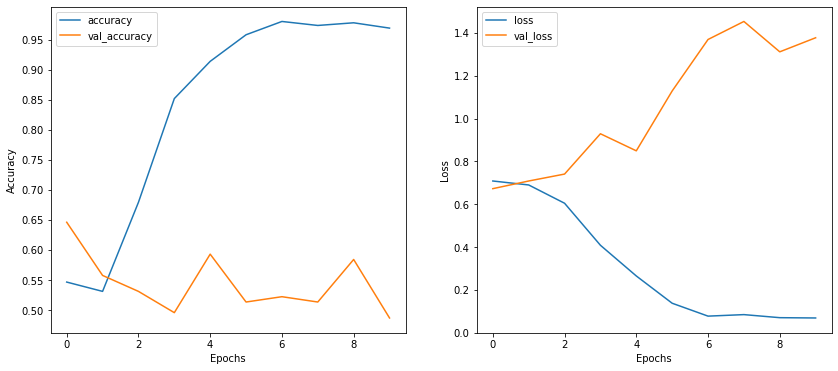

In [28]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.yticks(np.arange(-1, 1, 0.05))
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["accuracy", 'val_accuracy'])

plt.subplot(1,2,2)
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["loss", 'val_loss'])
plt.show()

## GRU Model

In [44]:
EMB_DIM = 32

model = tf.keras.Sequential([

    tf.keras.layers.Embedding(VOCAB_SIZE,EMB_DIM,input_length=MAXLEN),
    tf.keras.layers.GRU(64,dropout=0.2,return_sequences=True),
    tf.keras.layers.GRU(64),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=20, epochs=15, validation_data=(X_val, y_val))

Epoch 1/15
23/23 [==============================] - 5s 70ms/step - loss: 0.6941 - accuracy: 0.5332 - val_loss: 0.6814 - val_accuracy: 0.6549
Epoch 2/15
23/23 [==============================] - 1s 42ms/step - loss: 0.6915 - accuracy: 0.5265 - val_loss: 0.6767 - val_accuracy: 0.6549
Epoch 3/15
23/23 [==============================] - 1s 39ms/step - loss: 0.6898 - accuracy: 0.5133 - val_loss: 0.6968 - val_accuracy: 0.4248
Epoch 4/15
23/23 [==============================] - 1s 42ms/step - loss: 0.6838 - accuracy: 0.4978 - val_loss: 0.6681 - val_accuracy: 0.4690
Epoch 5/15
23/23 [==============================] - 1s 41ms/step - loss: 0.5482 - accuracy: 0.7345 - val_loss: 0.6145 - val_accuracy: 0.7257
Epoch 6/15
23/23 [==============================] - 1s 41ms/step - loss: 0.3405 - accuracy: 0.8628 - val_loss: 0.7837 - val_accuracy: 0.7168
Epoch 7/15
23/23 [==============================] - 1s 42ms/step - loss: 0.2414 - accuracy: 0.8938 - val_loss: 0.5299 - val_accuracy: 0.7257
Epoch 8/15
23

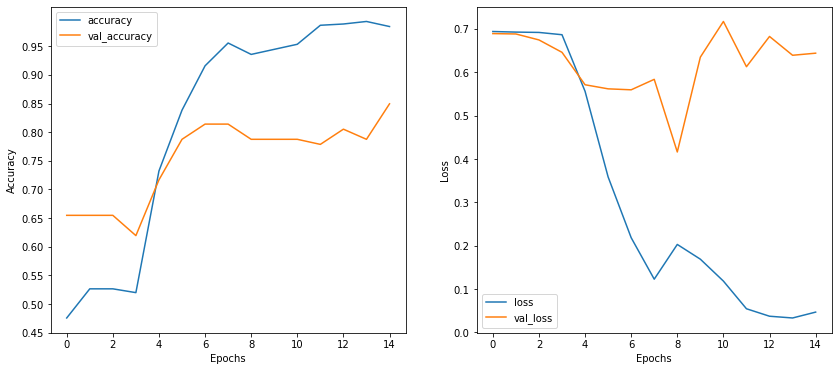

In [40]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.yticks(np.arange(-1, 1, 0.05))
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["accuracy", 'val_accuracy'])

plt.subplot(1,2,2)
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["loss", 'val_loss'])
plt.show()

## LSTM Model

In [41]:
EMB_DIM = 32

model = tf.keras.Sequential([

    tf.keras.layers.Embedding(VOCAB_SIZE,EMB_DIM,input_length=MAXLEN), 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,dropout=0.2,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=20, epochs=15, validation_data=(X_val, y_val))

Epoch 1/15
23/23 [==============================] - 7s 95ms/step - loss: 0.6938 - accuracy: 0.5221 - val_loss: 0.6814 - val_accuracy: 0.6549
Epoch 2/15
23/23 [==============================] - 1s 43ms/step - loss: 0.6714 - accuracy: 0.6040 - val_loss: 0.5673 - val_accuracy: 0.7611
Epoch 3/15
23/23 [==============================] - 1s 42ms/step - loss: 0.4878 - accuracy: 0.8009 - val_loss: 0.6352 - val_accuracy: 0.6903
Epoch 4/15
23/23 [==============================] - 1s 43ms/step - loss: 0.3246 - accuracy: 0.8739 - val_loss: 0.8021 - val_accuracy: 0.7611
Epoch 5/15
23/23 [==============================] - 1s 43ms/step - loss: 0.1924 - accuracy: 0.9358 - val_loss: 0.5276 - val_accuracy: 0.8407
Epoch 6/15
23/23 [==============================] - 1s 42ms/step - loss: 0.1394 - accuracy: 0.9535 - val_loss: 0.6411 - val_accuracy: 0.7788
Epoch 7/15
23/23 [==============================] - 1s 44ms/step - loss: 0.1056 - accuracy: 0.9668 - val_loss: 0.8103 - val_accuracy: 0.7699
Epoch 8/15
23

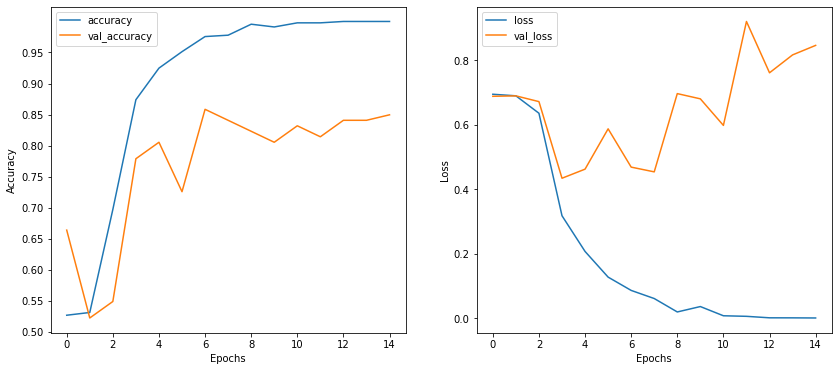

In [32]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.yticks(np.arange(-1, 1, 0.05))
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["accuracy", 'val_accuracy'])

plt.subplot(1,2,2)
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["loss", 'val_loss'])
plt.show()

In [33]:
loss, accuracy = model.evaluate(X_train, y_train,verbose=False)
print("Training accuracy: {:.4f}".format(accuracy),"\tTraining loss: {:.4f}".format(loss))
loss, accuracy = model.evaluate(X_val, y_val,verbose=False)
print("Validation accuracy: {:.4f}".format(accuracy),"\tValidation loss: {:.4f}".format(loss))
loss, accuracy = model.evaluate(X_test, y_test,verbose=False)
print("Testing accuracy: {:.4f}".format(accuracy),"\tTesting loss: {:.4f}".format(loss))

Training accuracy: 1.0000 	Training loss: 0.0001
Validation accuracy: 0.8496 	Validation loss: 0.8464
Testing accuracy: 0.8440 	Testing loss: 0.9007
